# Eyes open / Eyes closed

## Goal
The goal of this notebook is to assess the usability of deep learning (DL) in neuroscience by first applying it to a simple task such as being able to detect when the eyes of a person are open and when they are closed. (Alpha waves detection in the occipital area) 

## Outline

* Load the eyes open / eyes closed data from the mne.datasets.eegbci (https://martinos.org/mne/stable/generated/mne.datasets.eegbci.load_data.html?highlight=eyes%20open%20closed)
* Downsample the data to 256hz (we could go even lower - TBD)
* create multiple epochs based on theses baselines
* Check size of available dataset
* Prepare a copy of the data with a bandpass between 0.1 and 70 hz. 
* Perform the standard classifier comparison of sklearn on the raw data and on the the filtered data http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
* Train a Convolutional DL model to classify the task
* Train a LSTM DL model to classify the task
* Compare the DL with the other models
* If interesting results: look into the details of the DL layers

## Libraries

* MNE to load and prepare the data (check if we can do the preprocessing with it) 
* Matplotlib for the visualization 
* Sklearn for the ML
* Keras for the DL (with a TF backend)
* Numpy 

## Code

### Loading the data

In [2]:
import mne
from mne.datasets import eegbci

import numpy as np

# Firstwork with one subject to get the feeling of the data
##########
subject = 1
runs = [1,2] # Baseline: Eyes open vs eyes closed

raw_fnames = eegbci.load_data(subject, runs)

In [3]:
from mne.io import read_raw_edf
raw_files = [read_raw_edf(f, preload=True, stim_channel='auto') for f in
             raw_fnames]

Extracting edf Parameters from /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Created Raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Ready.
Extracting edf Parameters from /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R02.edf...
EDF file detected
Setting channel info structure...
Created Raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Ready.


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


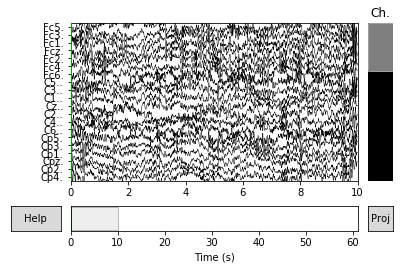

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-4-561acdfd706d>:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


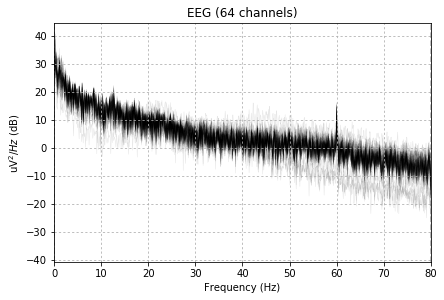

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


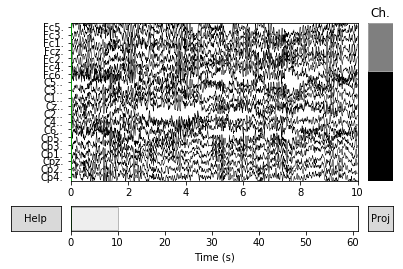

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-4-561acdfd706d>:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


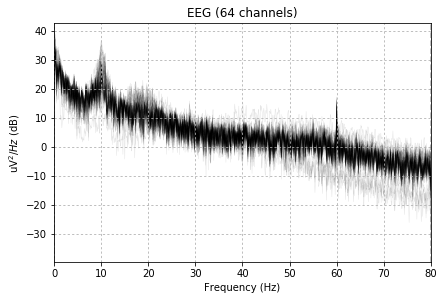

In [4]:
for rf in raw_files:
    rf.set_eeg_reference('average', projection=True)  # set EEG average reference
    rf.plot(block=True, lowpass=40)
    rf.plot_psd(tmax=np.inf, average=False)

In [5]:
# Now we will try with all the subjects 
##########
subjects = range(1,110)
runs = [1,2] # Baseline: Eyes open vs eyes closed

raw_fnames = list()
for subject in subjects: 
    raw_fnames.append(eegbci.load_data(subject, runs))


In [6]:
# We now need to flatten the list
flat_list = [item for sublist in raw_fnames for item in sublist]

In [7]:
raw_files = [read_raw_edf(f, preload=True, stim_channel='auto') for f in flat_list]

Extracting edf Parameters from /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Created Raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Ready.
Extracting edf Parameters from /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R02.edf...
EDF file detected
Setting channel info structure...
Created Raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Ready.
Extracting edf Parameters from /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R01.edf...
EDF file detected
Setting channel info structure...
Created Raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Ready.
Extracting edf Parameters from /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R02.edf...
EDF file detected
Setting channel info structure...
Created Raw.info structure...
Re

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


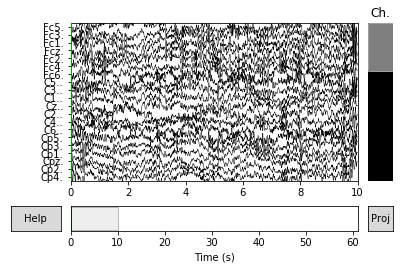

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


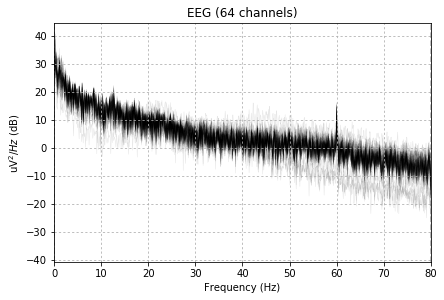

1
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


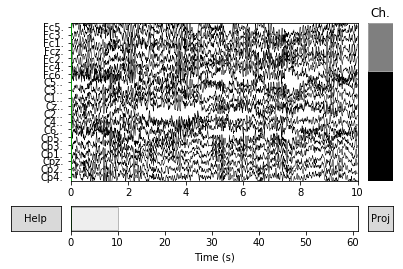

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


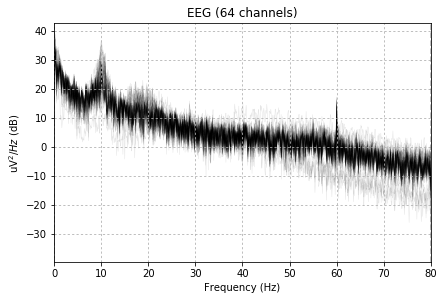

2
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


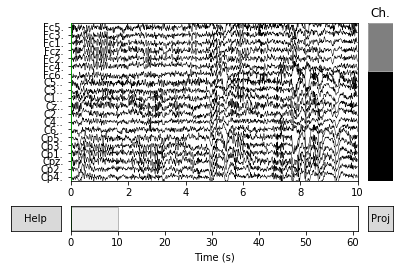

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


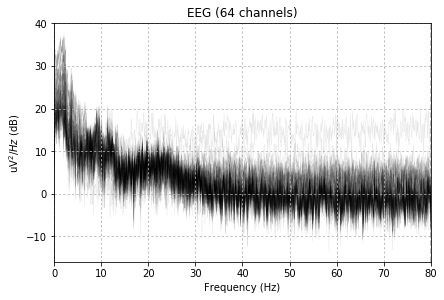

3
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


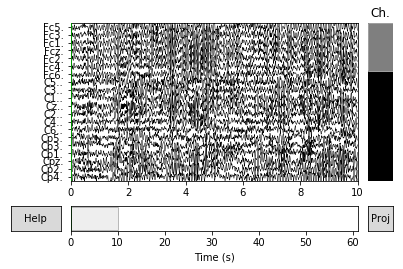

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


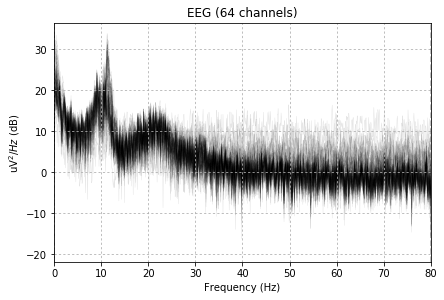

4
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


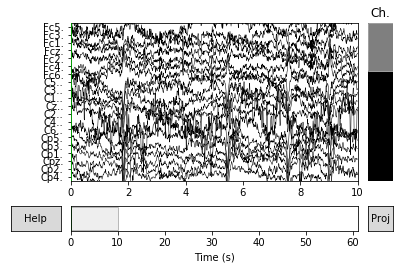

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


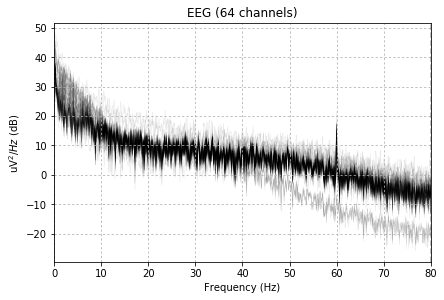

5
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


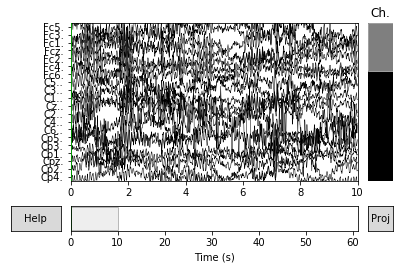

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


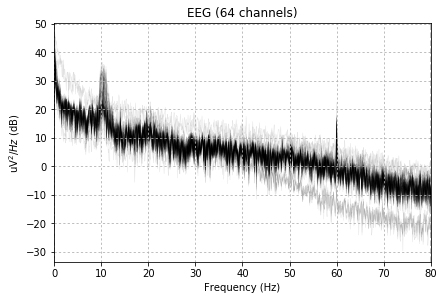

6
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


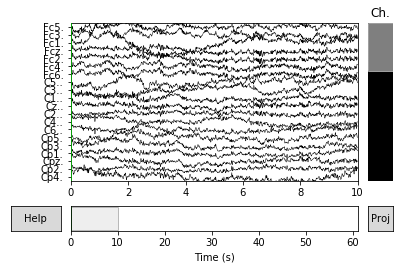

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


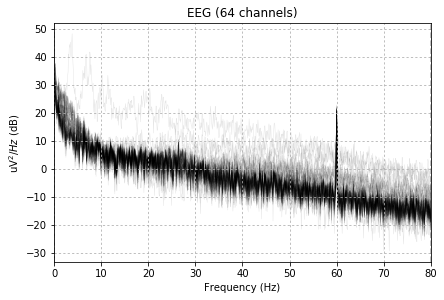

7
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


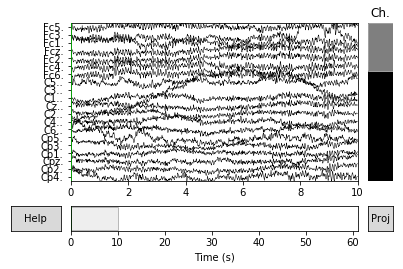

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


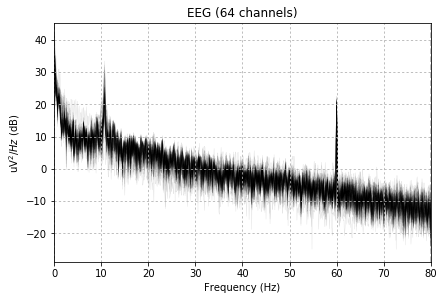

8
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


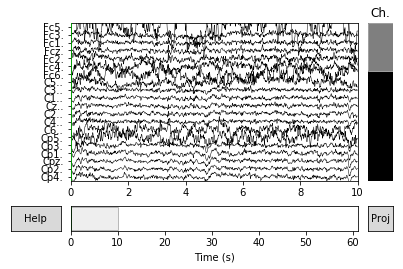

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


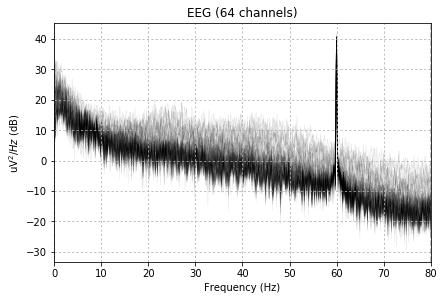

9
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


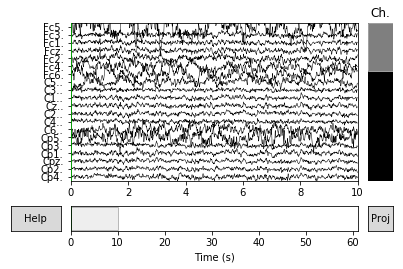

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


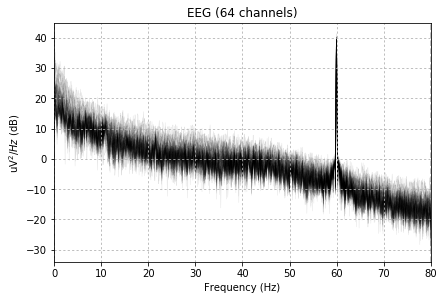

10
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


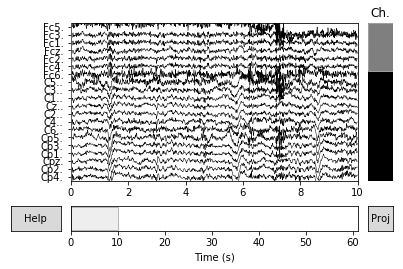

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


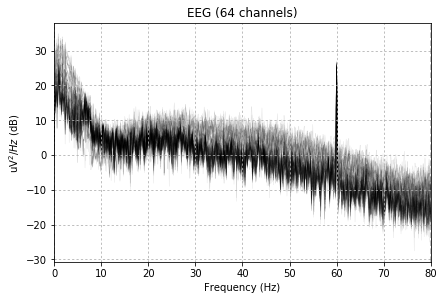

11
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


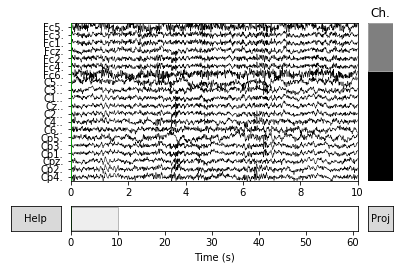

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


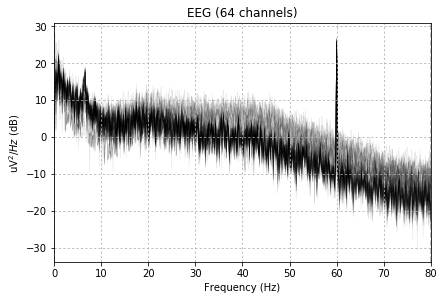

12
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


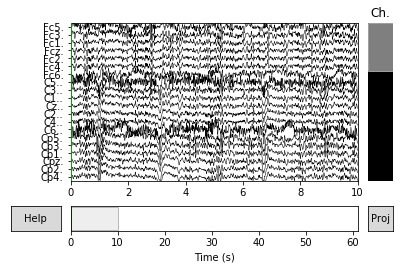

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


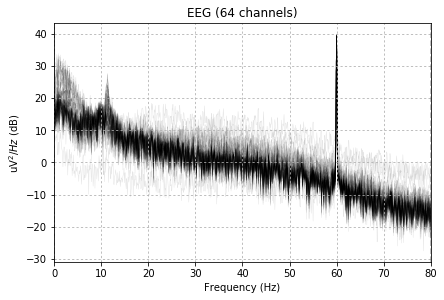

13
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


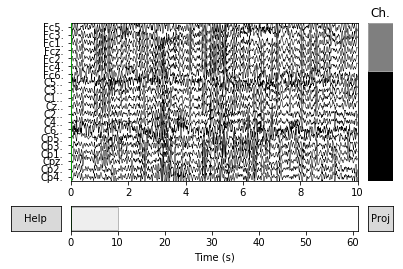

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


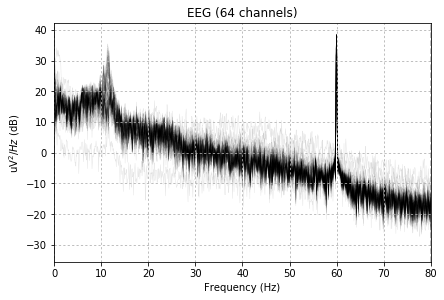

14
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


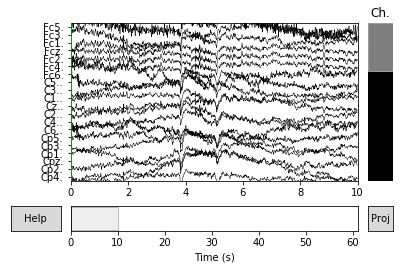

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


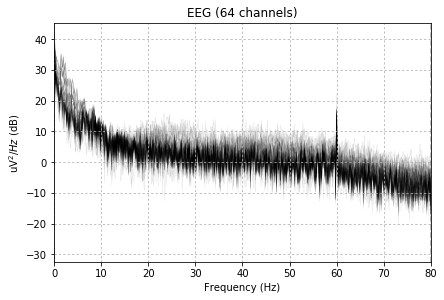

15
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


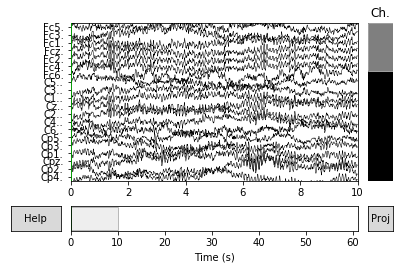

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


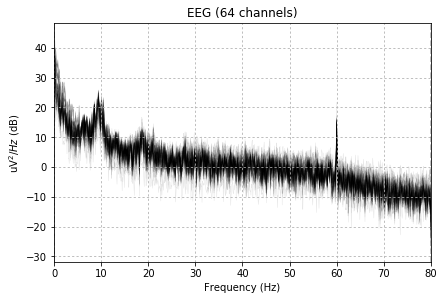

16
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


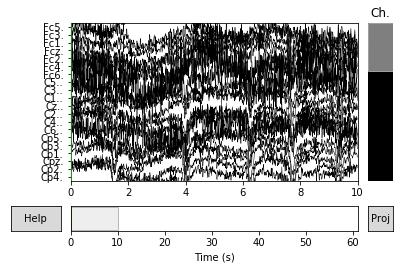

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


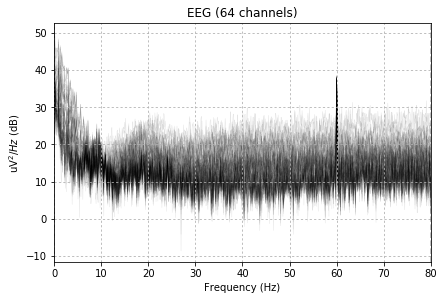

17
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


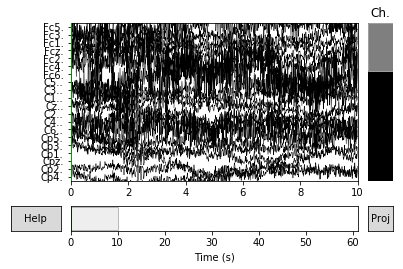

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


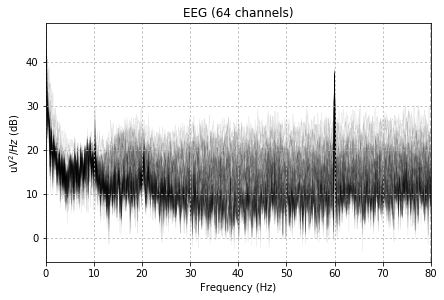

18
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


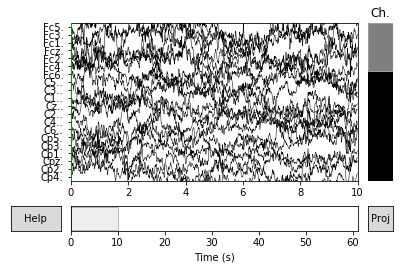

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


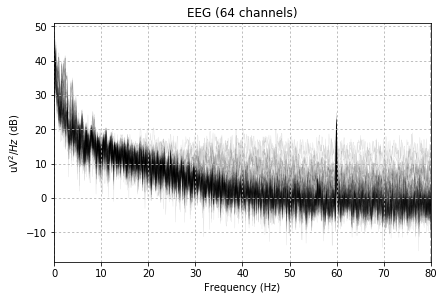

19
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


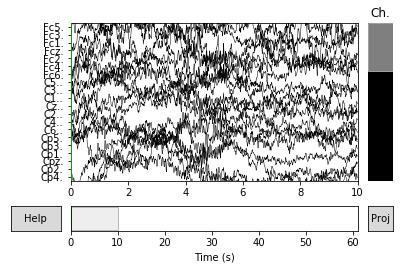

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-99ea4c3e8340>:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  rf.plot_psd(tmax=np.inf, average=False)


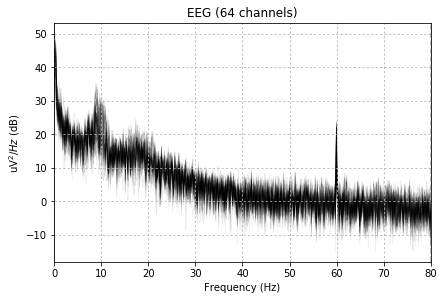

20


In [7]:
i = 0
for rf in raw_files[0:20]:
    rf.set_eeg_reference('average', projection=True)  # set EEG average reference
    rf.plot(block=True, lowpass=40)
    rf.plot_psd(tmax=np.inf, average=False)
    i = i+1
    print(i)

In [8]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

df = pd.DataFrame(raw_fnames)
df = df.rename(columns={0: "Eyes_Open", 1: "Eyes_Closed"})
df.head()

Eyes_Open  \
0  /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf   
1  /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R01.edf   
2  /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R01.edf   
3  /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R01.edf   
4  /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R01.edf   

                                                                              Eyes_Closed  
0  /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R02.edf  
1  /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R02.edf  
2  /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R02.edf  
3  /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R02.edf  
4  /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S005/S005R02.edf

In [9]:
raw_files_open = [read_raw_edf(f, preload=True, stim_channel='auto') for f in df.Eyes_Open]
raw_files_closed = [read_raw_edf(f, preload=True, stim_channel='auto') for f in df.Eyes_Closed]

Extracting edf Parameters from /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Created Raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Ready.
Extracting edf Parameters from /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R01.edf...
EDF file detected
Setting channel info structure...
Created Raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Ready.
Extracting edf Parameters from /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R01.edf...
EDF file detected
Setting channel info structure...
Created Raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Ready.
Extracting edf Parameters from /Users/axeluran/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S004/S004R01.edf...
EDF file detected
Setting channel info structure...
Created Raw.info structure...
Re

In [10]:
# The events are spaced evenly every 1 second.
duration = 1.
event_id_o = 1 # Eyes open
event_id_c = 0 # Eyes closed

# for fixed size events no start time before and after event
tmin = 0.
tmax = 0.99  # inclusive tmax, 1 second epochs


# create a fixed size events array
# start=0 and stop=None by default


# Get all the open events


temp_o = []

for raw_ in raw_files_open:    
    events_o = mne.make_fixed_length_events(raw_, event_id_o, duration=duration)
    # create :class:`Epochs <mne.Epochs>` object
    epochs_o = mne.Epochs(raw_, events=events_o, event_id=event_id_o, tmin=tmin,
                        tmax=tmax, baseline=None, verbose=True)
    for ep in epochs_o:
        temp_o.append(ep)

big_raw_o = np.array(temp_o)

# Get all the open events


temp_c = []

for raw_ in raw_files_closed:    
    events_c = mne.make_fixed_length_events(raw_, event_id_c, duration=duration)
    # create :class:`Epochs <mne.Epochs>` object
    epochs_c = mne.Epochs(raw_, events=events_c, event_id=event_id_c, tmin=tmin,
                        tmax=tmax, baseline=None, verbose=True)
    for ep in epochs_c:
        temp_c.append(ep)

big_raw_c = np.array(temp_c)



61 matching events found
0 projection items activated
61 matching events found
0 projection items activated
61 matching events found
0 projection items activated
61 matching events found
0 projection items activated
61 matching events found
0 projection items activated
61 matching events found
0 projection items activated
61 matching events found
0 projection items activated
61 matching events found
0 projection items activated
61 matching events found
0 projection items activated
61 matching events found
0 projection items activated
61 matching events found
0 projection items activated
61 matching events found
0 projection items activated
61 matching events found
0 projection items activated
60 matching events found
0 projection items activated
61 matching events found
0 projection items activated
61 matching events found
0 projection items activated
61 matching events found
0 projection items activated
61 matching events found
0 projection items activated
61 matching events found
0 p

In [11]:
print(big_raw_o.shape) 
print(big_raw_c.shape)
# Is the label in the channel 65?? 

(6645, 65, 159)
(6648, 65, 159)


In [12]:
labels_o = np.ones(len(big_raw_o))
labels_c = np.zeros(len(big_raw_c))

In [13]:
labels_c.shape

(6648,)

In [14]:
big_raw = np.concatenate((big_raw_o[:, :-1, :], big_raw_c[:, :-1, :]), axis=0)
big_labels = np.concatenate((labels_o, labels_c), axis=0)

print(big_raw.shape)
print(big_labels.shape)

(13293, 64, 159)
(13293,)


## Classifiers

### Imports

In [15]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [19]:
# Initialization of names and classifiers

# linear will not be good enough

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

names = ["Neural Net", "AdaBoost"]

#classifiers = [
#    KNeighborsClassifier(15),
#    SVC(gamma=2, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0)),
#    DecisionTreeClassifier(max_depth=5),
#    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#    MLPClassifier(alpha=1),
#    AdaBoostClassifier(),
#    GaussianNB(),
#    QuadraticDiscriminantAnalysis()]

classifiers = [
    MLPClassifier(alpha=1, verbose=True),
    AdaBoostClassifier()
]

In [17]:
# preprocess dataset, split into training and test part
X, y = big_raw, big_labels
nsamples, nx, ny = X.shape
X_d2 = X.reshape((nsamples,nx*ny))
X_d2 = StandardScaler().fit_transform(X_d2)
X_train, X_test, y_train, y_test = \
    train_test_split(X_d2, y, test_size=.4, random_state=42)

In [20]:
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    print('Classifer: ' + str(name) + '\n' + 'Score: ' + str(score))



Iteration 1, loss = 1.86457742
Iteration 2, loss = 1.25975237
Iteration 3, loss = 0.91900998
Iteration 4, loss = 0.92567539
Iteration 5, loss = 0.74122935
Iteration 6, loss = 0.65924653
Iteration 7, loss = 0.60690103
Iteration 8, loss = 0.53159015
Iteration 9, loss = 0.50165916
Iteration 10, loss = 0.51360118
Iteration 11, loss = 0.53238126
Iteration 12, loss = 0.83802854
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Classifer: Neural Net
Score: 0.729409552463
Classifer: AdaBoost
Score: 0.669424595713


In [35]:
X_3D_train, X_3D_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [37]:
y_test.shape

(5318,)

In [38]:
X_3D_train = X_3D_train.reshape(X_3D_train.shape[0], 1, 64, 159)
X_3D_test = X_3D_test.reshape(X_3D_test.shape[0], 1, 64, 159)

In [39]:
import tensorflow as tf
np.random.seed(42)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)
y_train.shape

(7975, 2)

In [33]:
# Declare Sequential model
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,64,159), data_format='channels_first'))

# Add more layers
model.add(Convolution2D(32, (3, 3), activation='relu'))
# MaxPooling Reduce number of parameters
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropout layer for regularization
model.add(Dropout(0.25))

# fully connected Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Dropout layer for regularization
model.add(Dropout(0.5))
# Dense layer with output 2 --> 2 classes
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_3D_train, y_train, 
          batch_size=32, epochs=10, verbose=1)

 

print(score)

Epoch 1/10
7975/7975 [==============================] - 198s - loss: 0.6934 - acc: 0.4928     

In [42]:
from keras.layers import Conv1D, BatchNormalization, Conv2D
from keras.layers import Reshape, Permute
from keras.layers import MaxPool1D, ZeroPadding2D

# EEGnet model
EEGnet = Sequential()

# Layer 1
EEGnet.add(Conv2D(input_shape=(1,64,159), filters=16, kernel_size=(64, 1), data_format='channels_first'))
EEGnet.add(BatchNormalization(axis=1))
EEGnet.add(Permute((2,1,3), input_shape=(16,1,159)))
EEGnet.add(Dropout(.25))

# Padding to get N % 4
EEGnet.add(ZeroPadding2D(padding=((0,1), (16,17)), data_format="channels_first"))

# Layer 2
EEGnet.add(Conv2D(filters=4, kernel_size=(2, 32), activation='relu', data_format='channels_first'))
EEGnet.add(BatchNormalization(axis=1))
EEGnet.add(MaxPooling2D(pool_size=(2,4), data_format='channels_first'))
EEGnet.add(Dropout(0.25))

# Padding to get N % 4
EEGnet.add(ZeroPadding2D(padding=((4,3), (2,1)), data_format="channels_first"))

# Layer 3
EEGnet.add(Conv2D(filters=4, kernel_size=(8, 4), activation='relu', data_format='channels_first'))
EEGnet.add(BatchNormalization(axis=1))
EEGnet.add(MaxPooling2D(pool_size=(2,4), data_format='channels_first'))
EEGnet.add(Dropout(0.25))


# Layer 4
EEGnet.add(Flatten())
EEGnet.add(Dense(2, activation='softmax'))

EEGnet.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

EEGnet.fit(X_3D_train, y_train, 
          batch_size=32, epochs=10, verbose=1)

score = EEGnet.evaluate(X_3D_test, y_test, batch_size=32)

print(score)

Epoch 1/10
7975/7975 [==============================] - 31s - loss: 0.7073 - acc: 0.5387      

In [45]:
from keras.utils.vis_utils import plot_model
plot_model(EEGnet, to_file='model.png')

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [27]:
X_3D_train_t = np.moveaxis(X_3D_train, 0, -1)
X_3D_test_t = np.moveaxis(X_3D_test, 0, -1)
X_3D_train.shape
X_3D_test.shape

(5318, 1, 64, 159)

In [26]:
for l in EEGnet.layers:
    print(l.name)
    print(l.input_shape)
    print(l.output_shape)
    

conv2d_4
(None, 1, 64, 159)
(None, 16, 1, 159)
batch_normalization_4
(None, 16, 1, 159)
(None, 16, 1, 159)
permute_2
(None, 16, 1, 159)
(None, 1, 16, 159)
dropout_4
(None, 1, 16, 159)
(None, 1, 16, 159)
zero_padding2d_3
(None, 1, 16, 159)
(None, 1, 17, 192)
conv2d_5
(None, 1, 17, 192)
(None, 4, 16, 161)
batch_normalization_5
(None, 4, 16, 161)
(None, 4, 16, 161)
max_pooling2d_3
(None, 4, 16, 161)
(None, 4, 8, 40)
dropout_5
(None, 4, 8, 40)
(None, 4, 8, 40)
zero_padding2d_4
(None, 4, 8, 40)
(None, 4, 15, 43)
conv2d_6
(None, 4, 15, 43)
(None, 4, 8, 40)
batch_normalization_6
(None, 4, 8, 40)
(None, 4, 8, 40)
max_pooling2d_4
(None, 4, 8, 40)
(None, 4, 4, 10)
dropout_6
(None, 4, 4, 10)
(None, 4, 4, 10)


In [101]:
for l in model.layers:
    print (l.input_shape)

(None, 1, 64, 159)
(None, 32, 62, 157)
(None, 30, 60, 32)
(None, 15, 30, 32)
(None, 15, 30, 32)
(None, 14400)
(None, 128)
(None, 128)


In [110]:
import keras.backend
for l in model.layers:
    print (l.output_shape)
    print(keras.backend.ndim(l.output))

(None, 32, 62, 157)
4
(None, 30, 60, 32)
4
(None, 15, 30, 32)
4
(None, 15, 30, 32)
4
(None, 14400)
2
(None, 128)
2
(None, 128)
2
(None, 2)
2


In [222]:
X_3D_train.shape

(7975, 1, 64, 159)

In [124]:
X_train_t = X_3D_train[:,:,1,:]

In [125]:
X_train_t.shape

(7975, 1, 159)

In [176]:
model_x=Sequential()
filters = 16
from keras.layers import Conv2D


model_x.add(Conv2D(input_shape=(1,64,159), filters=filters, kernel_size=(64, 1), data_format='channels_first'))
#model_x.add(Conv1D(input_shape=(9000,2),kernel_size=200,strides=1,filters=20))
model_x.output_shape

(None, 16, 1, 159)